# Trim and resize images

In [1]:
# Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 

# Set path training data
path_train = 'train'

# Get name of images in the training dataset
train_img = os.listdir(path_train)

print('Name of a few images: ', train_img[0:5])

Name of a few images:  ['10003_left.jpeg', '10003_right.jpeg', '10007_left.jpeg', '10007_right.jpeg', '10009_left.jpeg']


In [ ]:
# Trim black border and resize 
# The script for this function was inspired from here:
# http://www.developersite.org/101-193358-python
def trim_resize(img_path, resize=False, resize_to = 270):
    
    # keep a copy of original image
    original = cv2.imread('train/%s.jpeg' %img_path)

    # Read the image, convert it into grayscale, and make in binary image for threshold value of 1.
    img = cv2.imread('train/%s.jpeg' %img_path,0)

    # use binary threshold, all pixel that are beyond 3 are made white
    _, thresh = cv2.threshold(img, 3, 255, cv2.THRESH_BINARY)

    # Now find contours in it.
    im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    # get contours with highest height
    lst_contours = []
    for cnt in contours:
        ctr = cv2.boundingRect(cnt)
        lst_contours.append(ctr)
    x,y,w,h = sorted(lst_contours, key=lambda coef: coef[3])[-1]

    # Crop image
    crop = original[y:y+h,x:x+w]
    
    # Resize image
    if resize:
        res_img = cv2.resize(crop,(resize_to,resize_to),interpolation=cv2.INTER_AREA)
        # Write image to disk
        cv2.imwrite('data/%s.png' %(img_path), res_img)
    else:
        # Write image to disk
        cv2.imwrite('data/%s.png' %(img_path), crop)
    

In [ ]:
# Trim and resize all the images in the training dataset
for img_path in train_img:
    trim_resize(img_path, resize=True, resize_to=270)

# Plot some of the original images

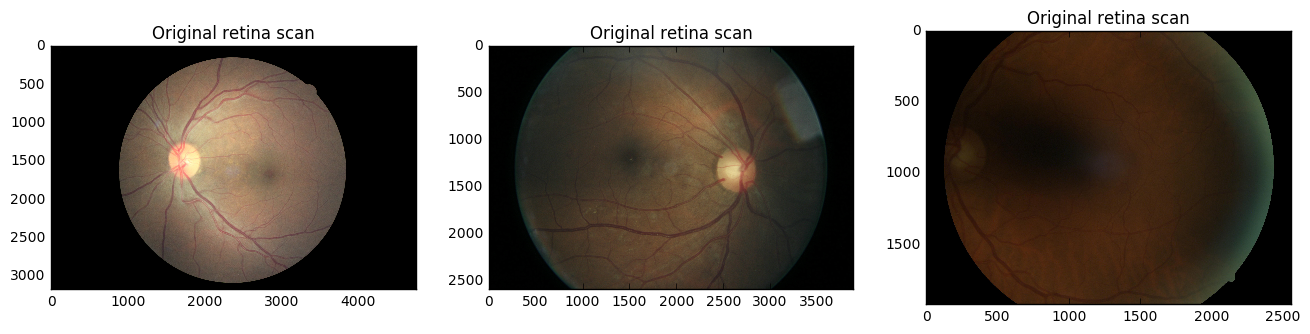

In [10]:
# Plot inline
%matplotlib inline

num_display = 3
fig = plt.figure(figsize=(16, 4))
for k in range(num_display):
    img = cv2.imread('train/%s' %(train_img[k*23]))
    # OpenCV represents images in reverse order:BGR
    # We will have to reverse the image back to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_display, k + 1)
    plt.imshow(img)
    plt.title('Original retina scan')
    plt.savefig('original_retina_scans.png')

# Original images vs. Trimmed and resized images

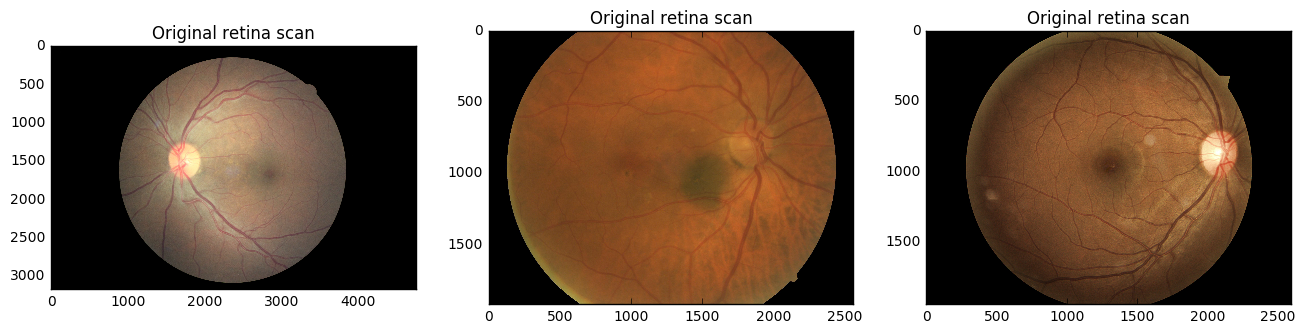

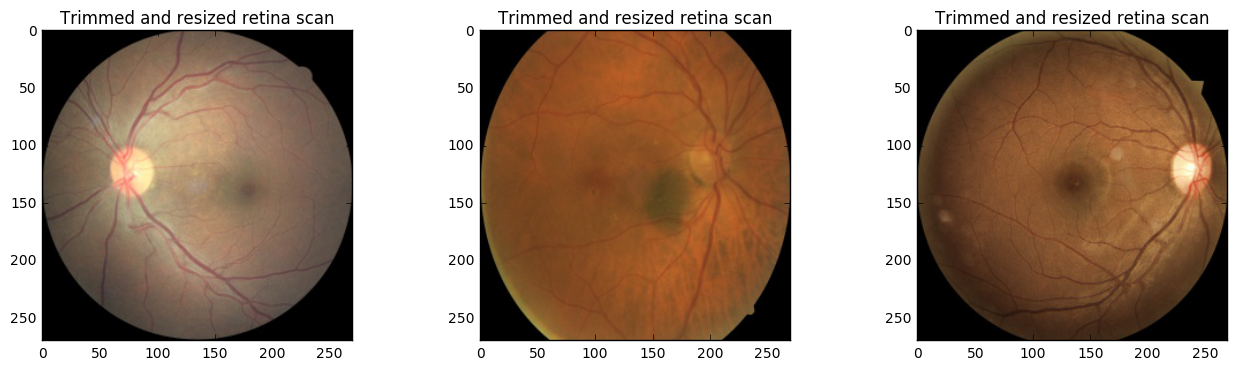

In [19]:
num_display = 3
fig = plt.figure(figsize=(16, 4))
for k in range(num_display):
    img = cv2.imread('train/%s' %(train_img[k*78]))
    # OpenCV represents images in reverse order:BGR
    # We will have to reverse the image back to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_display, k + 1)
    plt.imshow(img)
    plt.title('Original retina scan')
    plt.savefig('original_retina_scans_2.png')
plt.show()
fig = plt.figure(figsize=(16, 4))
for k in range(num_display):
    img = cv2.imread('data/%s' %(train_img[k*78]))
    # OpenCV represents images in reverse order:BGR
    # We will have to reverse the image back to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_display, k + 1)
    plt.imshow(img)
    plt.title('Trimmed and resized retina scan')
    plt.savefig('trimmed_resized_scan.png')
plt.show()